# Task 1: Introduction

In [95]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [96]:
def generate_examples(num=1000):
    W =[1.0, -3.0]
    b = 1.0

    W = np.reshape(W,(2,1))
    x = np.random.randn(num, 2)
    y = b + np.dot(x, W) + np.random.randn(num, 1)
    y = np.reshape(y, (num,1))
    return x, y

In [97]:
x, y = generate_examples()

In [98]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [99]:
print(x[0], y[0])

[-0.99165242  0.26328171] [0.97544211]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to
$
\begin{equation}
min(J)
\end{equation}
$

In [100]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true)**2) / (2*m)

In [101]:
model = Model(2)
print(model.W)
print(model.b)

[[ 0.84883629]
 [-0.17158618]]
-0.5637376394117433


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [102]:
class Model(Model):
    def forward_pass(self, x):
        y_hat = self.b + np.dot(x, self.W)
        return y_hat

In [103]:
y_hat = Model(2).forward_pass(x)
print(y_hat.shape, y_hat[0])

(1000, 1) [-0.77890054]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [104]:
# The compute_loss method has been moved into the Model class definition.
# def compute_loss(self, y_hat, y_true):
#     m = y_hat.shape[0]
#     return np.sum((y_hat - y_true)**2) / (2*m)

In [105]:
model = Model(2)
y_hat= model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [106]:
loss

np.float64(6.151439324416042)

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [107]:
class Model(Model):
    def backward_pass(self, x, y_true, y_hat):
        m = y_true.shape[0]
        db = 1/m*np.sum(y_hat-y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true), x), axis=0)
        return dW, db

In [108]:
model = Model(2)
x, y = generate_examples()
y_hat = model.forward_pass(x)
dW, db = model.backward_pass(x, y, y_hat)

In [109]:
print(dW, db)

[-0.53200341  3.91275626] -3.1579642331229403


# Task 7: Update Parameters

In [110]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W= self.W-lr*np.reshape(dW, (self.num_features,1))
        self.b = self.b-db

# Task 8: Training Loop

In [111]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses


In [112]:
import numpy as np

class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, X):
        return self.b + X @ self.W

    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])

    def backward_pass(self, X, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (X.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Current loss: {float(loss):.6f}")

        return losses

In [113]:
model = Model(2)

In [114]:
x_train, y_train = generate_examples()

In [115]:
losses = model.train(x_train, y_train, 1000, 3e-2)

Iter: 0, Loss: 2.8404
Iter: 100, Loss: 0.5065
Iter: 200, Loss: 0.4984
Iter: 300, Loss: 0.4984
Iter: 400, Loss: 0.4984
Iter: 500, Loss: 0.4984
Iter: 600, Loss: 0.4984
Iter: 700, Loss: 0.4984
Iter: 800, Loss: 0.4984
Iter: 900, Loss: 0.4984


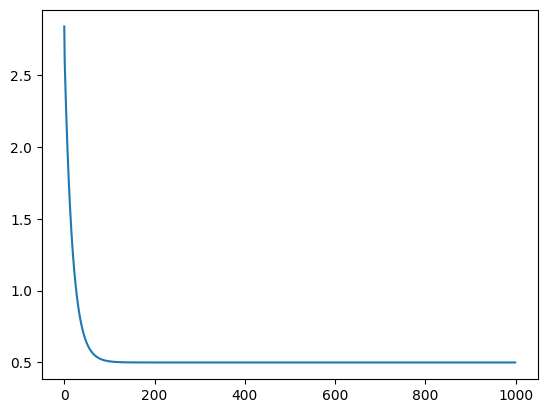

In [116]:
plt.plot(losses)

# Task 9: Predictions

In [120]:
import numpy as np

# ---------------------------
# Data Generator
# ---------------------------
def generate_examples(num=1000):
    W = np.array([[1.0], [-3.0]])   # true weights
    b = 1.0                         # true bias
    x = np.random.randn(num, 2)     # (num,2) features
    noise = np.random.randn(num, 1) # per-sample noise
    y = b + x @ W + noise           # linear relation + noise
    return x, y


# ---------------------------
# Linear Regression Model
# ---------------------------
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, x):
        return self.b + x @ self.W

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true) ** 2) / (2 * m)

    def backward_pass(self, x, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (x.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Loss: {float(loss):.6f}")

        return losses


# ---------------------------
# Training Example
# ---------------------------
x_train, y_train = generate_examples(1000)
model = Model(num_features=2)

losses = model.train(x_train, y_train, iterations=500, lr=3e-3)

print("\nFinal Weights:\n", model.W)
print("Final Bias:\n", model.b)


Iter: 1, Loss: 2.497075
Iter: 50, Loss: 1.988406
Iter: 100, Loss: 1.601055
Iter: 150, Loss: 1.312871
Iter: 200, Loss: 1.098457
Iter: 250, Loss: 0.938923
Iter: 300, Loss: 0.820217
Iter: 350, Loss: 0.731887
Iter: 400, Loss: 0.666157
Iter: 450, Loss: 0.617242
Iter: 500, Loss: 0.580840

Final Weights:
 [[ 1.01921102]
 [-2.56151581]]
Final Bias:
 0.8483755275025741


In [121]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']='somuap23110010352'
os.environ['KAGGLE_KEY']='16dcb07a4a0a874b5d270fd2dc01ec3c'

In [122]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 156MB/s]


In [123]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [124]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [125]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [126]:
print("\nDataset Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

In [127]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Drop 'id' column ( 'Unnamed: 32' was already dropped in a previous step)
df.drop(['id'], axis=1, inplace=True)

# Check for categorical columns (non-numeric)
categorical_cols = df.select_dtypes(exclude=np.number).columns

if len(categorical_cols) > 0:
    print(f"Categorical columns found: {list(categorical_cols)}")
    # Apply label encoding
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    print("\nDataFrame after label encoding:")
    display(df.head())
else:
    print("No categorical columns found to encode.")

# Display information about the dataframe after preprocessing
df.info()

Categorical columns found: ['diagnosis']

DataFrame after label encoding:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [128]:
# Reload the dataset
df = pd.read_csv('data.csv')

# Drop the 'Unnamed: 32' column as it seems to contain mostly null values
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
    print("Dropped 'Unnamed: 32' column.")

# Check for remaining null values and their counts
print("\nNull values per column after dropping 'Unnamed: 32':")
display(df.isnull().sum())

# Now you can choose how to handle remaining null values if any.
# For example, you could fill them with the mean:
# df.fillna(df.mean(), inplace=True)

# Or drop rows with any remaining nulls (if very few):
# df.dropna(inplace=True)

# Display info after handling nulls
df.info()

Dropped 'Unnamed: 32' column.

Null values per column after dropping 'Unnamed: 32':


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [131]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd

# Assuming df is already loaded and 'Unnamed: 32' is dropped as in previous steps

# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Encode the target variable 'diagnosis'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y_train and y_test to be (n_samples, 1) and convert to float
y_train = y_train.reshape(-1, 1).astype(float)
y_test = y_test.reshape(-1, 1).astype(float)

# Initialize the model with the correct number of features and train it
model = LinearModel(num_features=X_train_scaled.shape[1])
losses = model.train(X_train_scaled, y_train, iterations=1000, lr=0.01, log=False) # Set log=False to avoid repeated printing during training

# Calculate R2 score on the training data using the correctly initialized and trained model
y_train_pred = model.forward_pass(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)
print(f"R2 score on training data: {r2_train:.4f}")

R2 score on training data: 0.0958


Now, let's split the data into training and testing sets and calculate the R2 score on the test set.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Encode the target variable 'diagnosis'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y_train and y_test to be (n_samples, 1) and convert to float to match model's expected input
y_train = y_train.reshape(-1, 1).astype(float)
y_test = y_test.reshape(-1, 1).astype(float)

print("Data split and scaled successfully.")
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split and scaled successfully.
X_train shape: (455, 31)
X_test shape: (114, 31)
y_train shape: (455, 1)
y_test shape: (114, 1)


In [137]:
from sklearn.metrics import accuracy_score

# Convert predictions to binary output (0 or 1) based on a threshold (e.g., 0.5)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Accuracy on test data: {test_accuracy:.4f}")

Accuracy on test data: 0.7895


In [138]:
from sklearn.metrics import r2_score

# Make predictions on the scaled test data
y_test_pred = model.forward_pass(X_test_scaled)

# Calculate the R2 score on the test data
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 score on test data: {r2_test:.4f}")

R2 score on test data: -0.3801
